## Big Data Pipeline

We are going to obtain data from resources on the web, clean the data, visualize the data and then store the data in CSV format which can then be loaded on cloud or a database.

Our intent to obtain the information on current GDP of countries and the population statistics of the countries. These details are available from www.worldometers.info. But they are available as two different set of information. We are going to access the data from the two sets, clean them and put them together. 

In [1]:
!pip install requests
!pip install beautifulsoup4

You should consider upgrading via the 'C:\Anaconda3\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Anaconda3\python.exe -m pip install --upgrade pip' command.


#### Importing the packages required

In [2]:
import pandas as pd
from IPython.core.display import HTML
import requests
from bs4 import BeautifulSoup
import bs4
import json
from datetime import date

#### Reading the GDP data we require from the remote URL https://www.worldometers.info/gdp/gdp-per-capita/ . requests.get(URL) gets the entire content of a remote URL as a string.

In [3]:

URL="https://www.worldometers.info/gdp/gdp-per-capita/"
page = requests.get(URL)
soup = BeautifulSoup(page.content, 'html.parser')
stats_tbl = soup.find("table")


#### Parsing the string data to extract the information we require

In [4]:

def parse_table(tbl,cols):
    rows = []
    trows = tbl.find_all("tr")
    for tr in trows[1:]:
        row = []
        for td in tr.children:
            if isinstance(td,bs4.element.Tag):
                for data in td.children:
                    if isinstance(data,bs4.element.Tag):
                        for innerHTML in data.children:
                            row.append(innerHTML)
                    else:
                        row.append(data)
        rows.append(row)
    
    return pd.DataFrame(rows,columns=cols)

df = parse_table(stats_tbl,["Ranking","Country","GDP (PPP) per capita","GDP (nominal) per capita","vs. World PPP GDP per capita"])


In [5]:
df.head()

,Ranking,Country,GDP (PPP) per capita,GDP (nominal) per capita,vs. World PPP GDP per capita
0,1,Qatar,"$128,647","$61,264",752%
1,2,Macao,"$115,367","$80,890",675%
2,3,Luxembourg,"$107,641","$105,280",629%
3,4,Singapore,"$94,105","$56,746",550%
4,5,Brunei,"$79,003","$28,572",462%


#### Data Cleaning and Processing

In [6]:
# The data is present with $ sign and ,. This needs to be converted to numeric data
df['GDP (PPP) per capita'] = df['GDP (PPP) per capita'].str.replace("$","")
df['GDP (PPP) per capita'] = df['GDP (PPP) per capita'].str.replace(",","")
df['GDP (PPP) per capita'] = df['GDP (PPP) per capita'].str.replace("N.A.","0")
df['GDP (PPP) per capita'] = df['GDP (PPP) per capita'].astype(int)





<ipython-input-6-db6ec4ccf77d>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['GDP (PPP) per capita'] = df['GDP (PPP) per capita'].str.replace("$","")
<ipython-input-6-db6ec4ccf77d>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['GDP (PPP) per capita'] = df['GDP (PPP) per capita'].str.replace("N.A.","0")


In [7]:
df['GDP (nominal) per capita'] = df['GDP (nominal) per capita'].str.replace("$","")
df['GDP (nominal) per capita'] = df['GDP (nominal) per capita'].str.replace(",","")
df['GDP (nominal) per capita'] = df['GDP (nominal) per capita'].str.replace("N.A.","0")
df['GDP (nominal) per capita'] = df['GDP (nominal) per capita'].astype(int)



<ipython-input-7-71bfdbacfab0>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['GDP (nominal) per capita'] = df['GDP (nominal) per capita'].str.replace("$","")
<ipython-input-7-71bfdbacfab0>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['GDP (nominal) per capita'] = df['GDP (nominal) per capita'].str.replace("N.A.","0")


#### Visualizing the data

C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


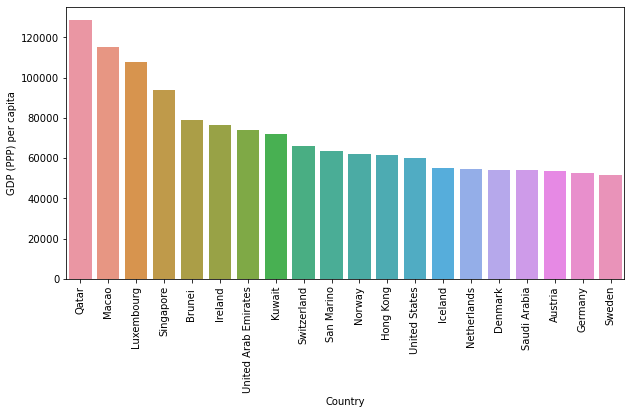

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

gdps = df['GDP (PPP) per capita'][0:20]
countries = df['Country'][0:20]

plt.figure(figsize=(10,5))
plot = sns.barplot(countries, gdps)

plot.set_xticklabels(countries, rotation=90)

plt.show()

#### Obtaining the information on population. We obtain the information from http://worldometers.info/world-population.

In [9]:
URL="http://worldometers.info/world-population"
page = requests.get(URL)
soup = BeautifulSoup(page.content, 'html.parser')
stats_tbl = soup.find(id="popbycountry")


#### Parsing the data and generating a dataframe from the data available in the link

In [10]:
df2 = parse_table(stats_tbl,["Pop Rank","Country","Population 2020","Yearly Change","Net Change", "People per KMSq","Land Area","Migrants","Fertility Rate","Median Age","Urban Population","World Share"])


In [11]:
df2.head(10)

,Pop Rank,Country,Population 2020,Yearly Change,Net Change,People per KMSq,Land Area,Migrants,Fertility Rate,Median Age,Urban Population,World Share
0,1,China,"1,439,323,776",0.39 %,"5,540,090",153,"9,388,211","-348,399",1.69,38,60.8 %,18.5 %
1,2,India,"1,380,004,385",0.99 %,"13,586,631",464,"2,973,190","-532,687",2.2402,28,35 %,17.7 %
2,3,United States,"331,002,651",0.59 %,"1,937,734",36,"9,147,420","954,806",1.7764,38,82.8 %,4.2 %
3,4,Indonesia,"273,523,615",1.07 %,"2,898,047",151,"1,811,570","-98,955",2.3195,30,56.4 %,3.5 %
4,5,Pakistan,"220,892,340",2 %,"4,327,022",287,"770,880","-233,379",3.55,23,35.1 %,2.8 %
5,6,Brazil,"212,559,417",0.72 %,"1,509,890",25,"8,358,140","21,200",1.74,33,87.6 %,2.7 %
6,7,Nigeria,"206,139,589",2.58 %,"5,175,990",226,"910,770","-60,000",5.4168,18,52 %,2.6 %
7,8,Bangladesh,"164,689,383",1.01 %,"1,643,222","1,265","130,170","-369,501",2.052,28,39.4 %,2.1 %
8,9,Russia,"145,934,462",0.04 %,"62,206",9,"16,376,870","182,456",1.8205,40,73.7 %,1.9 %
9,10,Mexico,"128,932,753",1.06 %,"1,357,224",66,"1,943,950","-60,000",2.14,29,83.8 %,1.7 %


#### Cleaning and Processing Data

In [12]:
df2['Population 2020'] = df2['Population 2020'].str.replace(",","")
df2['Population 2020'] = df2['Population 2020'].astype(int)

df2['Net Change'] = df2['Net Change'].str.replace(",","")
df2['Net Change'] = df2['Net Change'].astype(int)


df2['Land Area'] = df2['Land Area'].str.replace(",","")
df2['Land Area'] = df2['Land Area'].astype(int)

df2['Migrants'] = df2['Migrants'].str.replace(",","")
df2['Migrants'] = df2['Migrants'].replace(" ", "0")
df2['Migrants'] = df2['Migrants'].astype(int)

df2['Median Age'] = df2['Median Age'].replace("N.A.", "0")

df2['Median Age'] = df2['Median Age'].astype(int)

df2['Pop Rank'] = df2['Pop Rank'].astype(int)


#### Merging the two dataframes based on the column which has the same value - "Country"

In [13]:
df_new = df.merge(df2,on="Country")

#### Checking the data that is present in the newly formed dataframe, which has merged the GDP data and the population data

In [14]:
df_new.head(2).transpose()

,0,1
Ranking,1,2
Country,Qatar,Macao
GDP (PPP) per capita,128647,115367
GDP (nominal) per capita,61264,80890
vs. World PPP GDP per capita,752%,675%
Pop Rank,139,167
Population 2020,2881053,649335
Yearly Change,1.73 %,1.39 %
Net Change,48986,8890
People per KMSq,248,"21,645"


#### Visualizing the GDP data just as before, but this time in the order of population ranking. 

C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


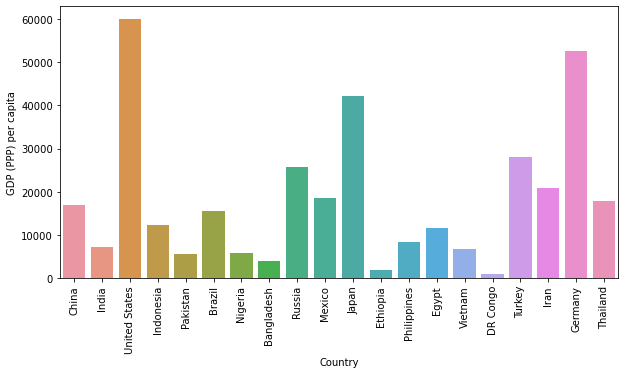

In [15]:
df_temp = df_new.sort_values(["Pop Rank"], axis=0, 
                 ascending=True) 
gdps = df_temp['GDP (PPP) per capita'][0:20]
countries = df_temp['Country'][0:20]

plt.figure(figsize=(10,5))
plot = sns.barplot(countries, gdps)

plot.set_xticklabels(countries, rotation=90)

plt.show()

#### Save the data to a CSV file with today's timestamp. 

In [16]:
timestamp = date.today().strftime("%d_%m_%Y")
df_new.to_csv("Details"+timestamp+".csv")